# **Sprint 8 - Proyecto**

**Paso 4. Análisis exploratorio de datos (Python)**

Además de los datos que recuperaste en las tareas anteriores te han dado un segundo archivo. Ahora tienes estos dos CSV:

[**/datasets/project_sql_result_01.csv**](https://practicum-content.s3.us-west-1.amazonaws.com/learning-materials/data-analyst-eng/moved_project_sql_result_01.csv). contiene los siguientes datos:

*company_name*: nombre de la empresa de taxis

*trips_amount*: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.

[**/datasets/project_sql_result_04.csv**](https://practicum-content.s3.us-west-1.amazonaws.com/learning-materials/data-analyst-eng/moved_project_sql_result_04.csv). contiene los siguientes datos:

*dropoff_location_name*: barrios de Chicago donde finalizaron los viajes

*average_trips*: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

Para estos dos datasets ahora necesitas

- importar los archivos
- estudiar los datos que contienen
- asegurarte de que los tipos de datos sean correctos
- identificar los 10 principales barrios en términos de finalización del recorrido
- hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones
- sacar conclusiones basadas en cada gráfico y explicar los resultados

**Paso 5. Prueba de hipótesis (Python)**

[**/datasets/project_sql_result_07.csv**](https://practicum-content.s3.us-west-1.amazonaws.com/learning-materials/data-analyst-eng/moved_project_sql_result_07.csv) — el resultado de la última consulta. Contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. Recuerda, estos son los valores de campo de la tabla:

- *start_ts*: fecha y hora de la recogida
- *weather_conditions*: condiciones climáticas en el momento en el que comenzó el viaje
- *duration_seconds*: duración del viaje en segundos

Prueba la hipótesis:

"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

Decide por tu cuenta dónde establecer el nivel de significación (alfa).

Explica:

- cómo planteaste las hipótesis nula y alternativa
- qué criterio usaste para probar las hipótesis y por qué

# Paso 4. Análisis exploratorio de datos (Python)

In [51]:
#Importamos las librerias necesarias para el análisis de datos y la visualización de datos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df_companyName_tripsAmount = pd.read_csv('moved_project_sql_result_01.csv') #Cargamos el dataset de company name y trips_amount
df_dropffs_avgTrips= pd.read_csv('moved_project_sql_result_04.csv') #Cargamos el dataset de dropoffs y avg_trips

In [53]:
df_dropffs_avgTrips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [54]:
df_companyName_tripsAmount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [55]:
print(df_companyName_tripsAmount.describe())
print(df_dropffs_avgTrips.describe())
#print(df_companyName_tripsAmount['company_name']) #Mostramos los nombres de las ubicaciones de dropoff
#print(df_dropffs_avgTrips['dropoff_location_name']) #Mostramos los nombres de las ubicaciones de dropoff

       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000
       average_trips
count      94.000000
mean      599.953728
std      1714.591098
min         1.800000
25%        14.266667
50%        52.016667
75%       298.858333
max     10727.466667


## Conclusion de los datos importados

En los dos DF tenemos todos los datos completos, no hay valores nulos, en cuanto al tipo de dato por cada columna, es el correcto, donde debe de ser tipo string, entero o flotante. Sabiendo esto podemos proceder con el analisis

# Identificar los 10 principales barrios en términos de finalización del recorrido

In [56]:
top_10_barrios = df_dropffs_avgTrips.sort_values(by='average_trips', ascending=False).head(10)
print(top_10_barrios)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


Obtenemos que en el top de los barrios con mas tiempo promedio de finalización son Loop, River North y Streeterville.

In [57]:
top_10_taxis = df_companyName_tripsAmount.sort_values(by='trips_amount', ascending=False).head(10)
print(top_10_taxis)

                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                   Medallion Leasin         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953


Las compañias de taxis con mayor cantidad de viajes es Flash Cab, seguido de Taxi Affiliation Services y en tercer lugar Medallion Leasin.

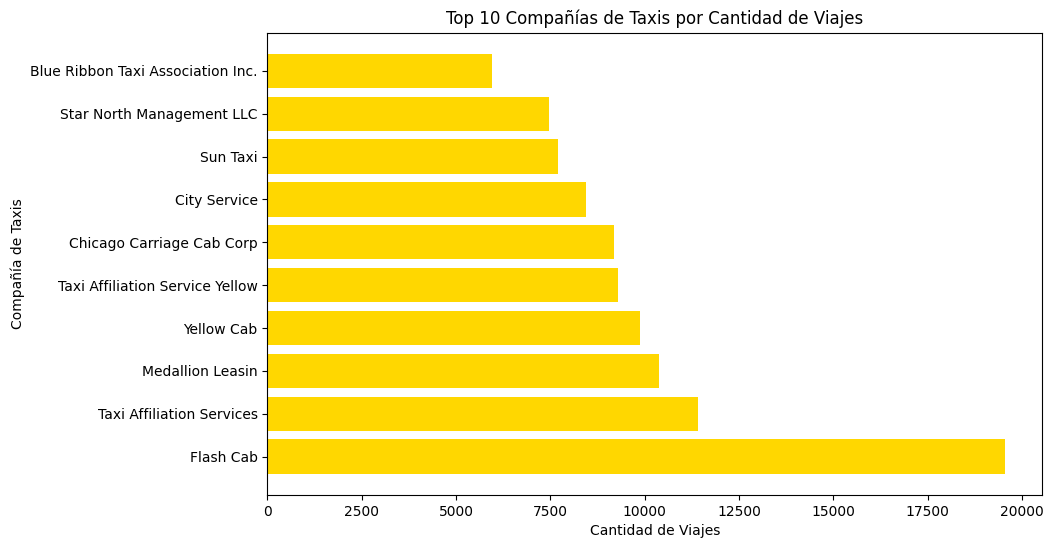

In [58]:
#Visualizamos los datos de la cantidad de viajes por compañia
plt.figure(figsize=(10, 6))
plt.barh(top_10_taxis['company_name'], top_10_taxis['trips_amount'], color='gold')
plt.xlabel('Cantidad de Viajes')
plt.ylabel('Compañía de Taxis')
plt.title('Top 10 Compañías de Taxis por Cantidad de Viajes')
plt.show()

Observamos que la compañia de taxis flash cab abarca la mayor cantidad de viajes, incluso se lleva mas del doble de algunas compañias. En segundo lugar tenemos a Taxi Affiliation Services y en tercer lugar a Medallion Leasin, en estos dos no hay mucha diferencia, habra que ver que hace diferente Flash Cab para tener esos números.

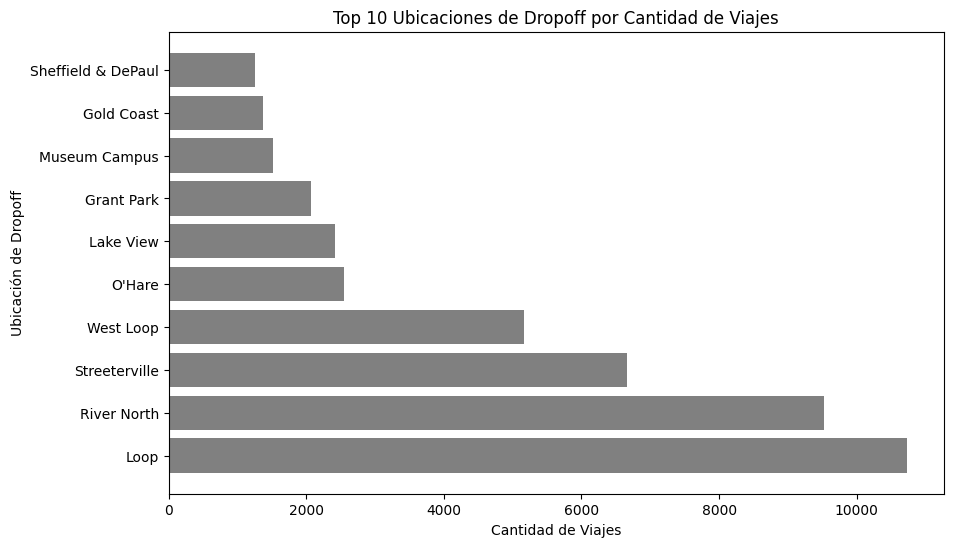

In [59]:
plt.figure(figsize=(10, 6))
plt.barh(top_10_barrios['dropoff_location_name'], top_10_barrios['average_trips'], color='grey')
plt.xlabel('Cantidad de Viajes')
plt.ylabel('Ubicación de Dropoff')
plt.title('Top 10 Ubicaciones de Dropoff por Cantidad de Viajes')
plt.show()

Observamos que los barrios que mas tienen dropoff de viajes son Loop River North, esto sera interesante de investigar para ver si la compáñia Flash Cab abarca más esta area o  no, seria interesante ver en donde toman más el taxi para poder ver la relacion con el dropoff, para asi poder mejorar números de las empresas que tienen menos exito.

# Paso 5. Prueba de hipótesis (Python)

In [60]:
import statistics as st
from scipy import stats
from scipy.stats import levene
df_viajes = pd.read_csv('moved_project_sql_result_07.csv') #Cargamos el dataset de viajes desde el Loop hasta el Aeropuerto internacional O'Hare
print(df_viajes.info())
print(df_viajes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None
                 start_ts weather_conditions  duration_seconds
0     2017-11-25 16:00:00               Good            2410.0
1     2017-11-25 14:00:00               Good            1920.0
2     2017-11-25 12:00:00               Good            1543.0
3     2017-11-04 10:00:00               Good            2512.0
4     2017-11-11 07:00:00               Good            1440.0
...                   ...                ...               ...
1063  2017-11-25 11:00:00               Good               0.0
1064  2017-11-11 10:00:00               Good            1318.0
1065  2017-11-11 13:00:0

Observamos que el dataser no tiene valores ausentes, yq ue los tipos de datos son los adecuados.

### Prueba de hipótesis
Hipotesis Nula: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos.

Hipotesis alternativa: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.


In [61]:
df_viajes_sin_lluvia = df_viajes[df_viajes['weather_conditions'] == 'Good'] #Filtramos los viajes sin lluvia
df_viajes_con_lluvia = df_viajes[df_viajes['weather_conditions'] == 'Bad'] #Filtramos los viajes con lluvia
stat_levene, p_levene = stats.levene(df_viajes_con_lluvia['duration_seconds'], df_viajes_sin_lluvia['duration_seconds']) #Realizamos la prueba de Levene para comprobar la igualdad de varianzas
print(f"Prueba de Levene:  Valor p={p_levene}")
equal_var = p_levene > 0.05
#Primero debemos comprobar que las dos varianzas sean iguales para hacer la prueba t.

Prueba de Levene:  Valor p=0.5332038671974493


Al obtener el valor P: 0.5332 puedo confirmar estadisticamente que las dos varianzas son iguales, ya que no se puede rechazar la hipotesis nula, que significa que no hay diferencia significativa en las varianzas de las dos muestras.

A continuacion se hará un estudio de prueba de tipo t, en el se decide usar el alpha en 0.05 ya que para estos casos de precisión nos vienen bien, si quisieramos más precisión se tendria que bajar el alpha a un número más pequeño.

In [62]:
stat_t, p_t = stats.ttest_ind(df_viajes_con_lluvia['duration_seconds'], df_viajes_sin_lluvia['duration_seconds'], equal_var=equal_var)
print(f"Prueba t: Valor p={p_t}")

if p_t < 0.05:
    print("Rechazamos la hipótesis nula: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.")
else:
    print("No se rechaza la hipótesis nula: no hay diferencia significativa en los ingresos.")


Prueba t: Valor p=6.517970327099473e-12
Rechazamos la hipótesis nula: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.


Con la prueba de tipo t, obtenemos como resultado que efectivamente varia la duración de los viajes con o sin lluvia los sabados.

Pero veamoslo de forma más grafica.

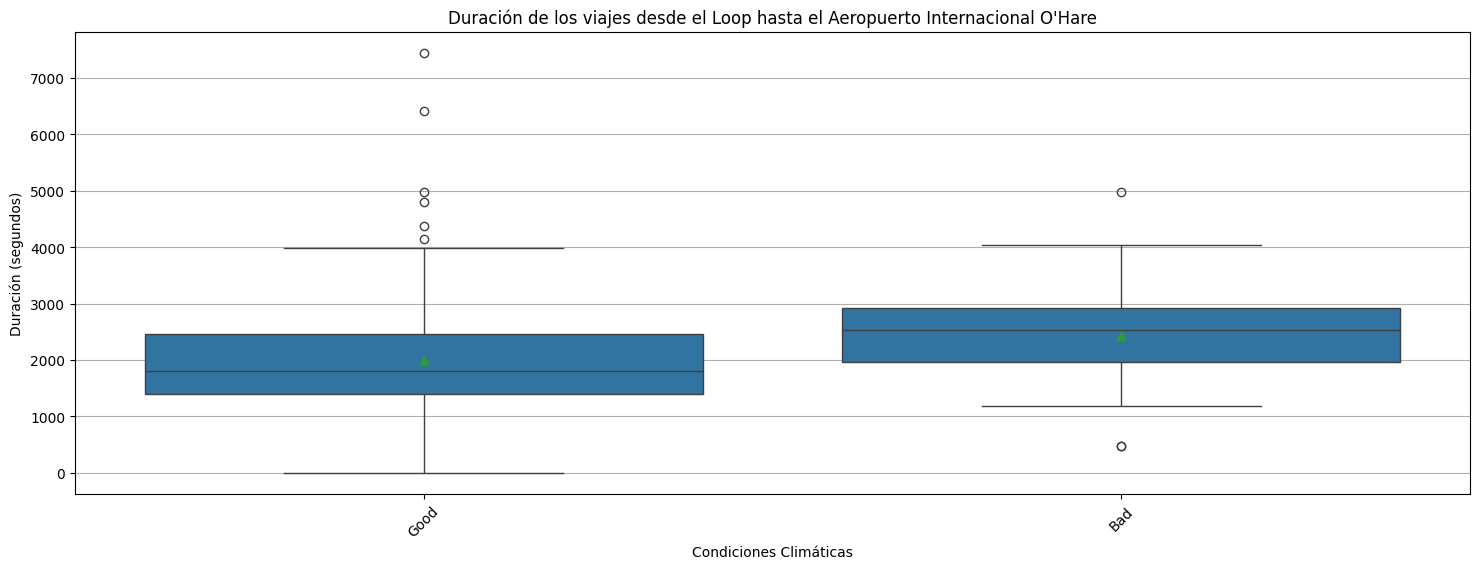

In [63]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.boxplot(
    data=df_viajes,
    x='weather_conditions',  # Categorical variable
    y='duration_seconds',  # Continuous variable
    showmeans=True,
    ax=ax)
plt.title('Duración de los viajes desde el Loop hasta el Aeropuerto Internacional O\'Hare')
plt.xlabel('Condiciones Climáticas')
plt.ylabel('Duración (segundos)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

C:\Users\oslo_\AppData\Local\Temp\ipykernel_13940\604213339.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Condiciones Climáticas', loc='upper right')


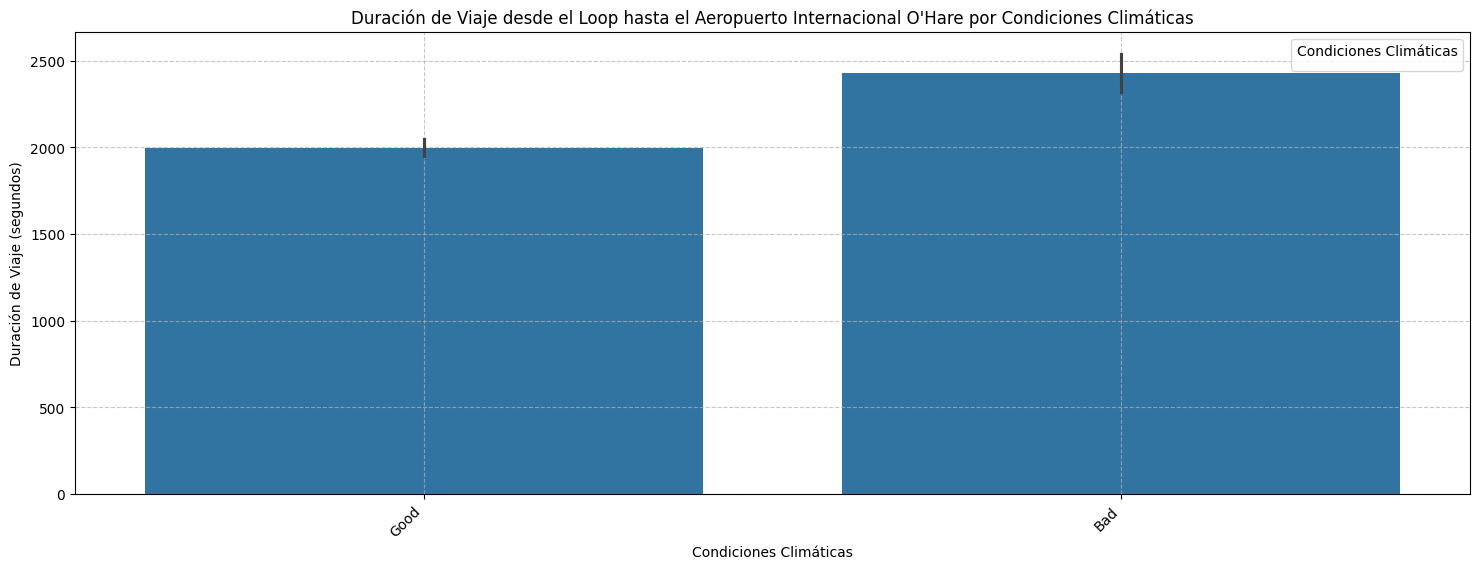

In [64]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(
    data=df_viajes,
    x='weather_conditions',  # Categorical variable
    y='duration_seconds',  # Continuous variable
    ax=ax)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Condiciones Climáticas')
plt.ylabel('Duración de Viaje (segundos)')
plt.title('Duración de Viaje desde el Loop hasta el Aeropuerto Internacional O\'Hare por Condiciones Climáticas')
plt.legend(title='Condiciones Climáticas', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

Con esto podemos observar que cuando hay una condicion mala ("Bad") la gente tiende demorar más en los viajes de taxi, esto se puede deber al trafico que se genera por las condiciones climatologicas.

# Conclusión

Al terminar de ver las graficas y ver el resultado de la prueba de hipótesis, podemos concluir que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos, esta información puede ser util para los taxistas que vean tales condiciones para saber que pueden tener mayor demanda, ademas de a los conductores privados de saber que puede haber más trafico en ese trayecto. Para futuros analisis esto es un buen inicio para pueder plantear que el clima afecta a otras actividades.